In [1]:
from pandas import DataFrame as df
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'

import json
import folium

In [2]:
#2018년, test16은 2019년거 제거해야 함
test7=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201801_02.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test8=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201803_04.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test9=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201805.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test10=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201806.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test11=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201807.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test12=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201808.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test13=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201809.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test14=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201810.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test15=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201811.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test16=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201812_201905.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')

In [3]:
#2019년인 행의 index 명을 date_2019 객체에 저장
date_2019=test16[test16['대여일자'].dt.year==2019].index
test16 =test16.drop(date_2019)
test16

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2018-12-01,00,1721,1721. 창동역 2번출구,정기권,\N,~10대,1,25.95,0.26,1130.0,4
1,2018-12-01,00,3511,3511. 응봉역 1번출구,정기권,\N,~10대,1,52.59,0.39,1660.0,72
2,2018-12-01,00,1975,1975. 대림역 1번 출입구 밑,정기권,\N,~10대,1,136.26,1.17,5060.0,21
3,2018-12-01,00,110,110. 사천교,정기권,\N,~10대,1,17.76,0.16,690.0,2
4,2018-12-01,00,749,749. 이대 목동병원 앞,정기권,\N,~10대,1,95.67,0.70,3020.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
460031,2018-12-31,23,1623,1623. 노원 구민회관,일일권,M,30대,1,38.00,0.23,1010.0,6
460032,2018-12-31,23,394,394. 경희궁 자이 3단지,일일권,M,40대,1,64.86,0.54,2340.0,26
460033,2018-12-31,23,207,207. 여의나루역 1번출구 앞,단체권,\N,~10대,2,786.85,4.61,19870.0,103
460034,2018-12-31,23,338,338. 세운스퀘어 앞,단체권,F,30대,2,30.60,0.32,1380.0,14


In [4]:
test2018=pd.concat([test7,test8,test9,test10,test11,test12,test13,test14,test15,test16]) #데이터 합침
test2018.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,사용시간
0,2018-01-01,0,300.0,정동사거리,정기권,F,~10대,1.0,37.32,0.34,1450.0,23.0,NaN
1,2018-01-01,0,505.0,자양사거리 광진아크로텔 앞,정기권,F,20대,1.0,54.83,0.49,2130.0,15.0,NaN
2,2018-01-01,0,1531.0,미아사거리 1번 출구,정기권,F,20대,1.0,78.34,0.73,3140.0,17.0,NaN
3,2018-01-01,0,516.0,광진메디칼 앞,정기권,F,20대,1.0,29.95,0.29,1240.0,5.0,NaN
4,2018-01-01,0,3508.0,화양사거리,정기권,F,20대,1.0,46.09,0.45,1940.0,43.0,NaN


In [5]:
test2018.tail()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,사용시간
460031,2018-12-31,23,1623.0,1623. 노원 구민회관,일일권,M,30대,1.0,38.00,0.23,1010.0,NaN,6.0
460032,2018-12-31,23,394.0,394. 경희궁 자이 3단지,일일권,M,40대,1.0,64.86,0.54,2340.0,NaN,26.0
460033,2018-12-31,23,207.0,207. 여의나루역 1번출구 앞,단체권,\N,~10대,2.0,786.85,4.61,19870.0,NaN,103.0
460034,2018-12-31,23,338.0,338. 세운스퀘어 앞,단체권,F,30대,2.0,30.60,0.32,1380.0,NaN,14.0
460035,2018-12-31,23,1308.0,1308. 안암로터리 버스정류장 앞,단체권,M,20대,2.0,283.09,1.96,8410.0,NaN,46.0


In [6]:
test2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8692606 entries, 0 to 460035
Data columns (total 13 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   대여시간    object        
 2   대여소번호   float64       
 3   대여소명    object        
 4   대여구분코드  object        
 5   성별      object        
 6   연령대코드   object        
 7   이용건수    float64       
 8   운동량     float64       
 9   탄소량     float64       
 10  이동거리    float64       
 11  이동시간    float64       
 12  사용시간    float64       
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 928.5+ MB


In [7]:
test2018.shape

(8692606, 13)

In [8]:
# msno.matrix(test2018) #결측치 확인
# plt.show()
# #데이터 양이 많아서 안되는듯?

In [9]:
test2018.isnull() #컬럼별로 결측지 있는지 확인

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,사용시간
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
460031,False,False,False,False,False,False,False,False,False,False,False,True,False
460032,False,False,False,False,False,False,False,False,False,False,False,True,False
460033,False,False,False,False,False,False,False,False,False,False,False,True,False
460034,False,False,False,False,False,False,False,False,False,False,False,True,False


In [10]:
#대여시간의 데이터의 형태(?)가 일정하지 않음
#0~9는 00~09와 합쳐져야 함
def function(x):
    if x =='0':
        return '00'
    elif x=='1':
        return '01'
    elif x=='2':
        return '02'
    elif x=='3':
        return '03'
    elif x=='4':
        return '04'
    elif x=='5':
        return '05'
    elif x=='6':
        return '06'
    elif x=='7':
        return '07'
    elif x=='8':
        return '08'
    elif x=='9':
        return '09'
    else :
        return x
test2018['대여시간']=test2018['대여시간'].apply(function)
test2018

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,사용시간
0,2018-01-01,00,300.0,정동사거리,정기권,F,~10대,1.0,37.32,0.34,1450.0,23.0,NaN
1,2018-01-01,00,505.0,자양사거리 광진아크로텔 앞,정기권,F,20대,1.0,54.83,0.49,2130.0,15.0,NaN
2,2018-01-01,00,1531.0,미아사거리 1번 출구,정기권,F,20대,1.0,78.34,0.73,3140.0,17.0,NaN
3,2018-01-01,00,516.0,광진메디칼 앞,정기권,F,20대,1.0,29.95,0.29,1240.0,5.0,NaN
4,2018-01-01,00,3508.0,화양사거리,정기권,F,20대,1.0,46.09,0.45,1940.0,43.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
460031,2018-12-31,23,1623.0,1623. 노원 구민회관,일일권,M,30대,1.0,38.00,0.23,1010.0,NaN,6.0
460032,2018-12-31,23,394.0,394. 경희궁 자이 3단지,일일권,M,40대,1.0,64.86,0.54,2340.0,NaN,26.0
460033,2018-12-31,23,207.0,207. 여의나루역 1번출구 앞,단체권,\N,~10대,2.0,786.85,4.61,19870.0,NaN,103.0
460034,2018-12-31,23,338.0,338. 세운스퀘어 앞,단체권,F,30대,2.0,30.60,0.32,1380.0,NaN,14.0


In [11]:
test2018['월']=test2018['대여일자'].dt.month
test2018['일']=test2018['대여일자'].dt.day
test2018['요일']=test2018['대여일자'].dt.dayofweek

In [12]:
dayofweek = test2018.groupby(['요일'])[['이용건수']].agg('sum')

In [13]:
#day 데이터에 요일 컬럼 추가
#월:0, 화:1, 수:2, 목:3, 금:4, 토:5, 일:6
add_today=['월','화','수','목','금','토','일']
dayofweek['today']=add_today

In [14]:
dayofweek

,이용건수,today
요일,,
0.0,1143890.0,월
1.0,1071544.0,화
2.0,1163635.0,수
3.0,1063623.0,목
4.0,1152241.0,금
5.0,1073269.0,토
6.0,952316.0,일


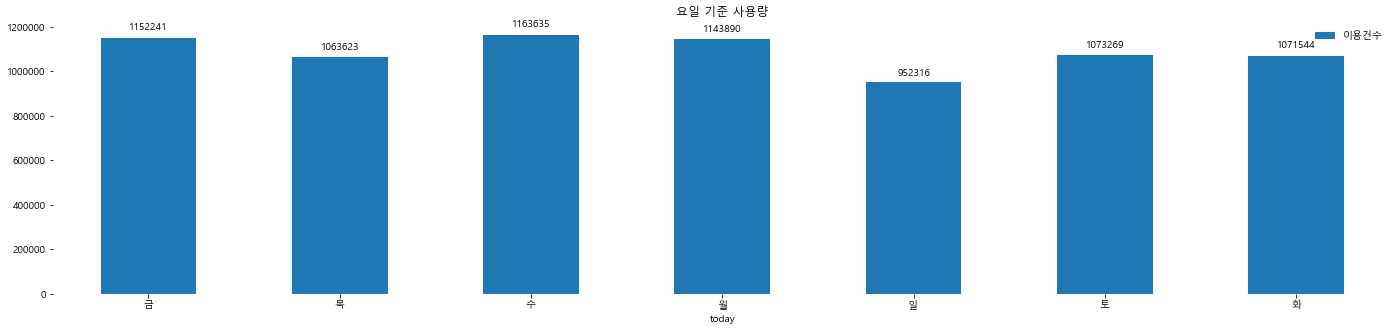

In [15]:
week = dayofweek.groupby(['today'])[['이용건수']].agg('sum')
ax=week.plot(kind='bar', figsize=(24, 5), rot=0,title="요일 기준 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

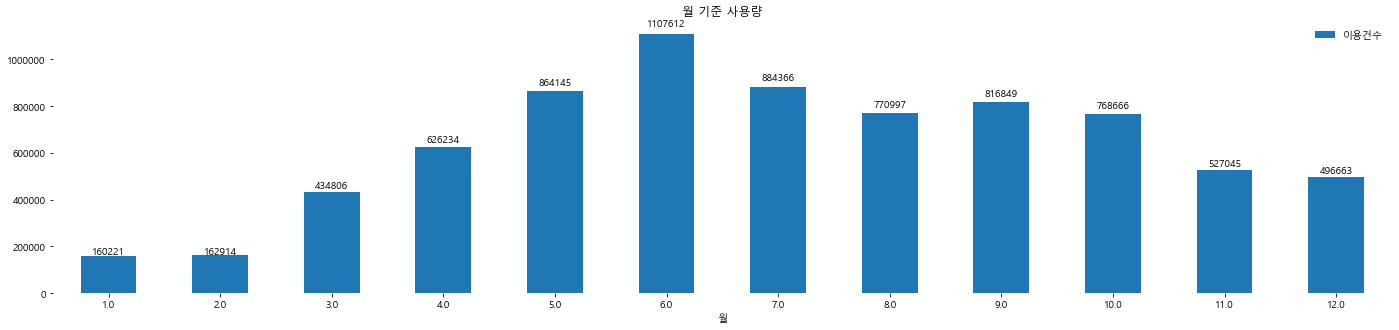

In [16]:
month = test2018.groupby(['월'])[['이용건수']].agg('sum')
ax=month.plot(kind='bar', figsize=(24, 5), rot=0,title="월 기준 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

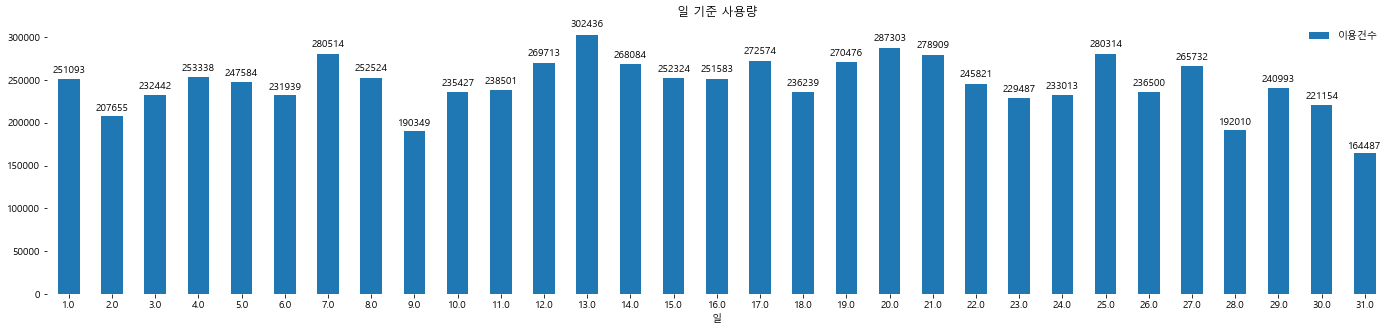

In [17]:
day = test2018.groupby(['일'])[['이용건수']].agg('sum')
ax=day.plot(kind='bar', figsize=(24, 5), rot=0, title="일 기준 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

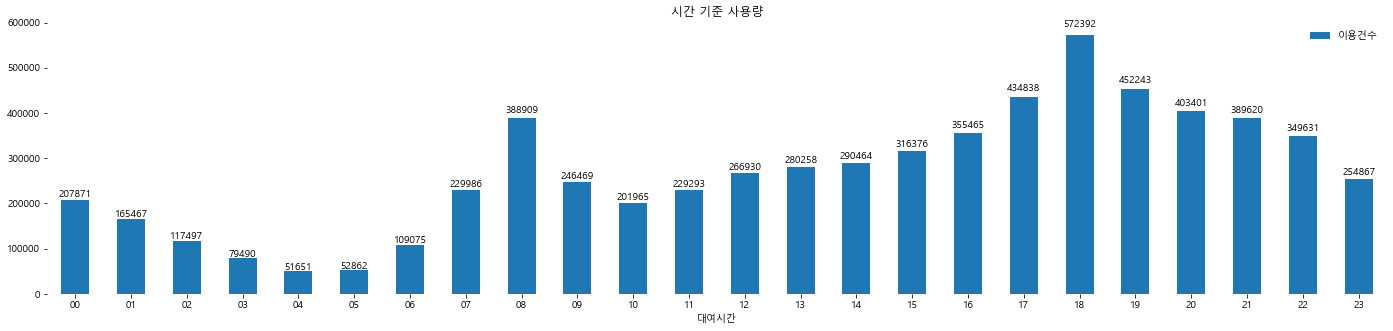

In [18]:
time=test2018.groupby('대여시간')['이용건수'].count()
ax=time.plot(kind='bar',figsize=(24, 5), rot=0, title="시간 기준 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()


In [19]:
accident2018_month=pd.read_csv('data/2018교통사고_월.csv',encoding='euc-kr')
accident2018_day=pd.read_csv('data/2018교통사고_요일.csv',encoding='euc-kr')
accident2018_time=pd.read_csv('data/2018교통사고_시간.csv',encoding='euc-kr')

In [20]:
accident2018_month

,월,사고건수,사망자수,부상자수
0,1,62,0,62
1,2,68,2,68
2,3,94,0,100
3,4,129,0,135
4,5,146,3,161
5,6,206,3,230
6,7,141,1,156
7,8,125,3,128
8,9,171,0,185
9,10,154,2,167


In [21]:
accident2018_day

,요일,사고건수,사망자수,부상자수
0,일,192.0,3.0,212.0
1,월,187.0,1.0,197.0
2,화,216.0,5.0,226.0
3,수,227.0,4.0,240.0
4,목,227.0,1.0,242.0
5,금,221.0,1.0,237.0
6,토,201.0,3.0,219.0
7,NaN,NaN,NaN,NaN


In [22]:
accident2018_time

,시간,사고건수,사망자수,부상자수
0,00시~02시,32,0,35
1,02시~04시,13,1,12
2,04시~06시,34,3,35
3,06시~08시,86,0,91
4,08시~10시,157,1,171
5,10시~12시,148,2,154
6,12시~14시,140,2,144
7,14시~16시,202,1,214
8,16시~18시,245,3,268
9,18시~20시,190,0,203


In [23]:
#nan 데이터 제거
accident2018_time=accident2018_time.dropna(how='all',axis=1)
accident2018_time

,시간,사고건수,사망자수,부상자수
0,00시~02시,32,0,35
1,02시~04시,13,1,12
2,04시~06시,34,3,35
3,06시~08시,86,0,91
4,08시~10시,157,1,171
5,10시~12시,148,2,154
6,12시~14시,140,2,144
7,14시~16시,202,1,214
8,16시~18시,245,3,268
9,18시~20시,190,0,203


In [24]:
accident2018_day=accident2018_day.dropna(how='all',axis=0)

In [25]:
accident2018_month.info()
accident2018_day.info()
accident2018_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   월       12 non-null     int64
 1   사고건수    12 non-null     int64
 2   사망자수    12 non-null     int64
 3   부상자수    12 non-null     int64
dtypes: int64(4)
memory usage: 512.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   요일      7 non-null      object 
 1   사고건수    7 non-null      float64
 2   사망자수    7 non-null      float64
 3   부상자수    7 non-null      float64
dtypes: float64(3), object(1)
memory usage: 280.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시간      12 non-null     object
 1   사고건수    12 non-null     int64 
 2   사망자수    12 non-

In [26]:
#accident2018_day 데이터 사고건수,사망자수,부상자수 데이터 타입 int로 변경
accident2018_day['사고건수']=accident2018_day['사고건수'].astype(int)
accident2018_day['사망자수']=accident2018_day['사망자수'].astype(int)
accident2018_day['부상자수']=accident2018_day['부상자수'].astype(int)

In [27]:
#자전거 이용현황 시간별 데이터와 자전거 교통사고 시간별 데이터 기준이 달라서 같게 만들어야함
#자전거 교통사고를 기준으로 데이터 만들기로 함
time=test2018.groupby(["대여시간"])[["이용건수"]].count()
time

,이용건수
대여시간,
00,207871
01,165467
02,117497
03,79490
04,51651
05,52862
06,109075
07,229986
08,388909


In [28]:
#자전거 이용시간 데이터를 교통사고 데이터처럼 합치는 작업
time1=time.iloc[0]+time.iloc[1]
time2=time.iloc[2]+time.iloc[3]
time3=time.iloc[4]+time.iloc[5]
time4=time.iloc[6]+time.iloc[7]
time5=time.iloc[8]+time.iloc[9]
time6=time.iloc[10]+time.iloc[11]
time7=time.iloc[12]+time.iloc[13]
time8=time.iloc[14]+time.iloc[15]
time9=time.iloc[16]+time.iloc[17]
time10=time.iloc[18]+time.iloc[19]
time11=time.iloc[20]+time.iloc[21]
time12=time.iloc[22]+time.iloc[23]

In [29]:
#새로운 시간대별 자전거 이용건수 데이터 프레임 생성
data=["00시~02시","02시~04시","04시~06시","06시~08시","08시~10시","10시~12시","12시~14시","14시~16시","16시~18시","18시~20시","20시~22시","22시~24시"]
time_df=df([time1,time2,time3,time4,time5,time6,time7,time8,time9,time10,time11,time12])
time_df['시간']=df(data)

In [30]:
time_df

,이용건수,시간
0,373338,00시~02시
1,196987,02시~04시
2,104513,04시~06시
3,339061,06시~08시
4,635378,08시~10시
5,431258,10시~12시
6,547188,12시~14시
7,606840,14시~16시
8,790303,16시~18시
9,1024635,18시~20시


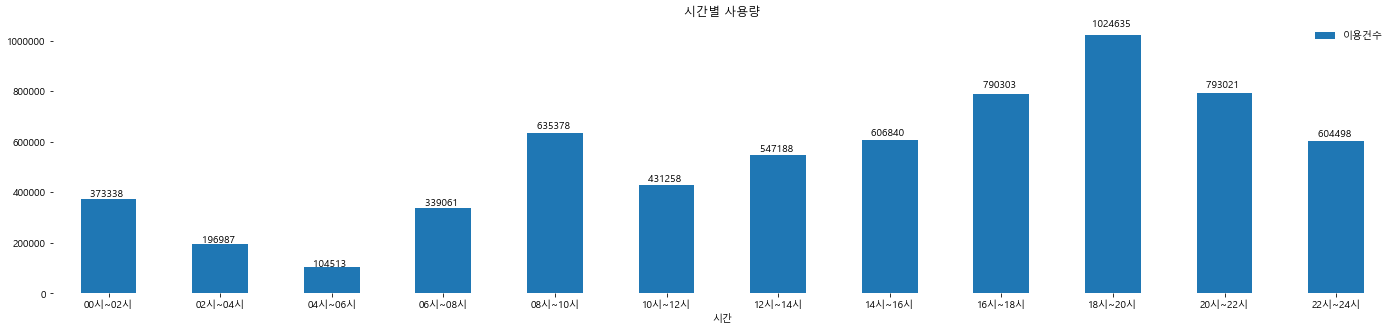

In [31]:
bicycle_time=time_df.groupby(["시간"])[['이용건수']].agg('sum')
ax=bicycle_time.plot(kind='bar', figsize=(24, 5), rot=0, title="시간별 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d "%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

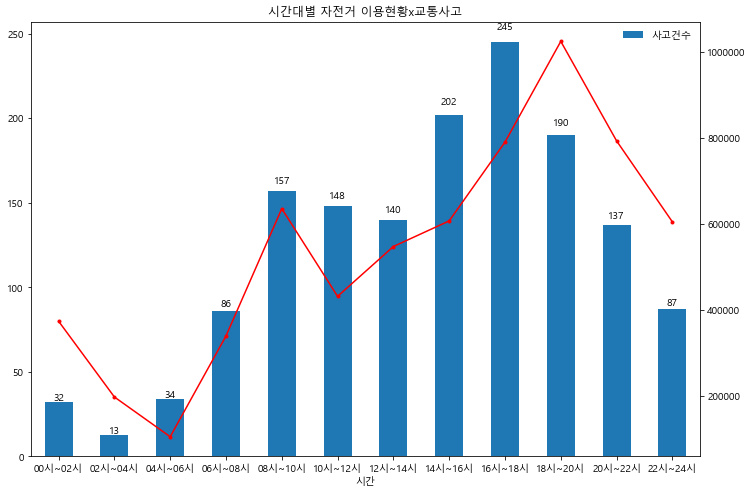

In [32]:
#시간대별 자전거 이용x교통사고
ac_time=accident2018_time.groupby(['시간'])[['사고건수']].agg('sum')
ax=ac_time.plot(kind='bar', figsize=(12, 8), rot=0, title="시간대별 자전거 이용현황x교통사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx() # bar 그래프와 plot 그래프 합치기
plt.plot(bicycle_time,'r.-')
plt.show()

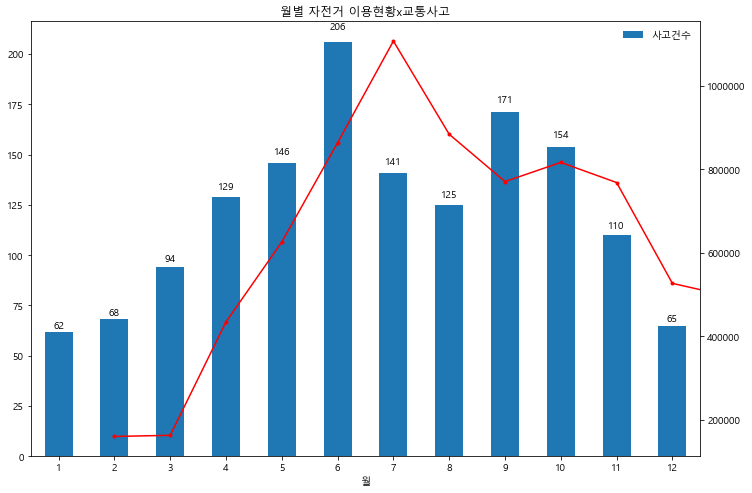

In [33]:
#월별 자전거 이용x교통사고
ac_month=accident2018_month.groupby(['월'])[['사고건수']].agg('sum')
ax=ac_month.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 자전거 이용현황x교통사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx() # bar 그래프와 plot 그래프 합치기
plt.plot(month,'r.-')
plt.show()

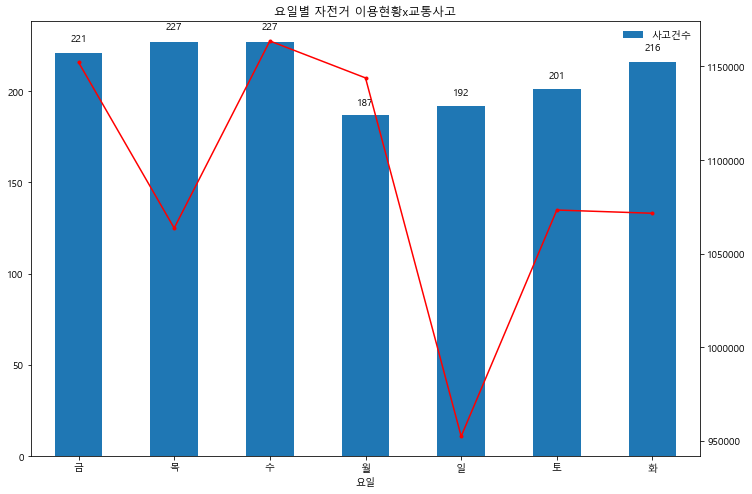

In [34]:
#요일별 자전거 이용x교통사고
ac_day=accident2018_day.groupby(['요일'])[['사고건수']].agg('sum')
ax=ac_day.plot(kind='bar', figsize=(12, 8), rot=0, title="요일별 자전거 이용현황x교통사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx() # bar 그래프와 plot 그래프 합치기
plt.plot(week,'r.-')
plt.show()

In [35]:
ac_day=accident2018_day.groupby(['요일'])[['사고건수']].agg('sum')
ac_day

,사고건수
요일,
금,221
목,227
수,227
월,187
일,192
토,201
화,216


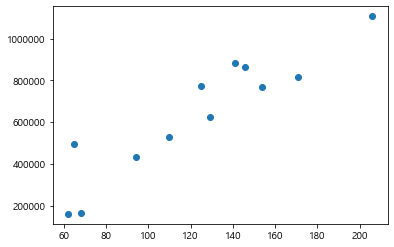

array([[2.01499242e+03, 1.20215061e+07],
       [1.20215061e+07, 8.42463576e+10]])

In [37]:
#월별 상관관계 분석을 해봄
plt.scatter(ac_month["사고건수"], month['이용건수'])
plt.show()
#공분산
np.cov(ac_month["사고건수"], month['이용건수'])

In [42]:
#상관관계
ac_month["사고건수"].corr(month['이용건수'])

0.922670435015558

In [44]:
np.corrcoef(ac_month["사고건수"], month['이용건수'])

array([[1.        , 0.92267044],
       [0.92267044, 1.        ]])

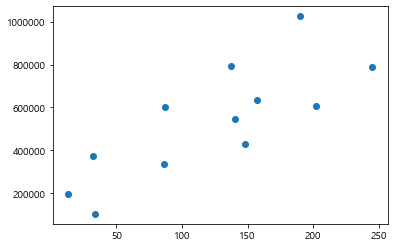

array([[5.34953788e+03, 1.53847047e+07],
       [1.53847047e+07, 6.96829310e+10]])

In [45]:
#시간대별 상관관계 분석을 해봄
plt.scatter(ac_time["사고건수"], bicycle_time['이용건수'])
plt.show()
#공분산
np.cov(ac_time["사고건수"], bicycle_time['이용건수'])

In [46]:
#상관관계
ac_time["사고건수"].corr(bicycle_time['이용건수'])

0.7968339425248864

In [47]:
np.corrcoef(ac_time["사고건수"], bicycle_time['이용건수'])

array([[1.        , 0.79683394],
       [0.79683394, 1.        ]])

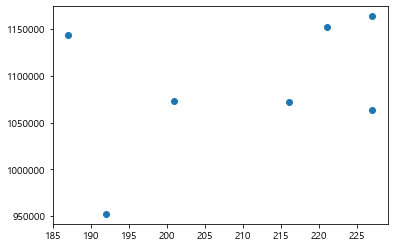

array([[2.78142857e+02, 4.61346095e+05],
       [4.61346095e+05, 5.41008727e+09]])

In [50]:
#요일별 상관관계 분석을 해봄
plt.scatter(ac_day["사고건수"], week['이용건수'])
plt.show()
#공분산
np.cov(ac_day["사고건수"], week['이용건수'])

In [51]:
#상관관계
ac_day["사고건수"].corr(week['이용건수'])

0.37608910971345444

In [53]:
np.corrcoef(ac_day["사고건수"], week['이용건수'])

array([[1.        , 0.37608911],
       [0.37608911, 1.        ]])